# Exploratory Data Analysis

In [1]:
# Constants
DATA_PATH = "../data/processed/1_preprocessed_df.pkl"

In [2]:
# Load packages
import pandas as pd 
import numpy as np

from pathlib import Path
import logging
import pickle

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [3]:
# A function to save figures 
IMAGES_PATH = Path.cwd().parent / "Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Load dataset and make a copy
prep_df = pd.read_pickle(DATA_PATH)
df = prep_df.copy()

In [5]:
df.columns

Index(['country', 'product', 'salesPerWeek', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'product.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label', 'discount', 'profit', 'day',
       'month', 'year', 'hex_main', 'hex_sec', 'prices_diff', 'month_year'],
      dtype='object')

In [6]:
import scipy.stats as stats

#calculate point-biserial correlation
stats.pointbiserialr(df['profit'], df['label'])

SignificanceResult(statistic=0.1803416304573942, pvalue=0.0)

In [7]:
df[['salesPerWeek', 'regular_price', 'current_price',
       'ratio', 'promo1', 'promo2','cost', 'discount', 'day', 'month',
       'year', 'profit']].corrwith(df['label'].astype('float'), method=stats.pointbiserialr)

,salesPerWeek,regular_price,current_price,ratio,promo1,promo2,cost,discount,day,month,year,profit
0,-1.166505e-01,-0.015027,0.183402,0.447122,6.410506e-02,2.016475e-02,0.00213,-0.447122,-0.008493,-0.142569,0.014771,0.180342
1,6.796643e-300,0.000002,0.000000,0.000000,1.500290e-91,1.803285e-10,0.50055,0.000000,0.007238,0.000000,0.000003,0.000000


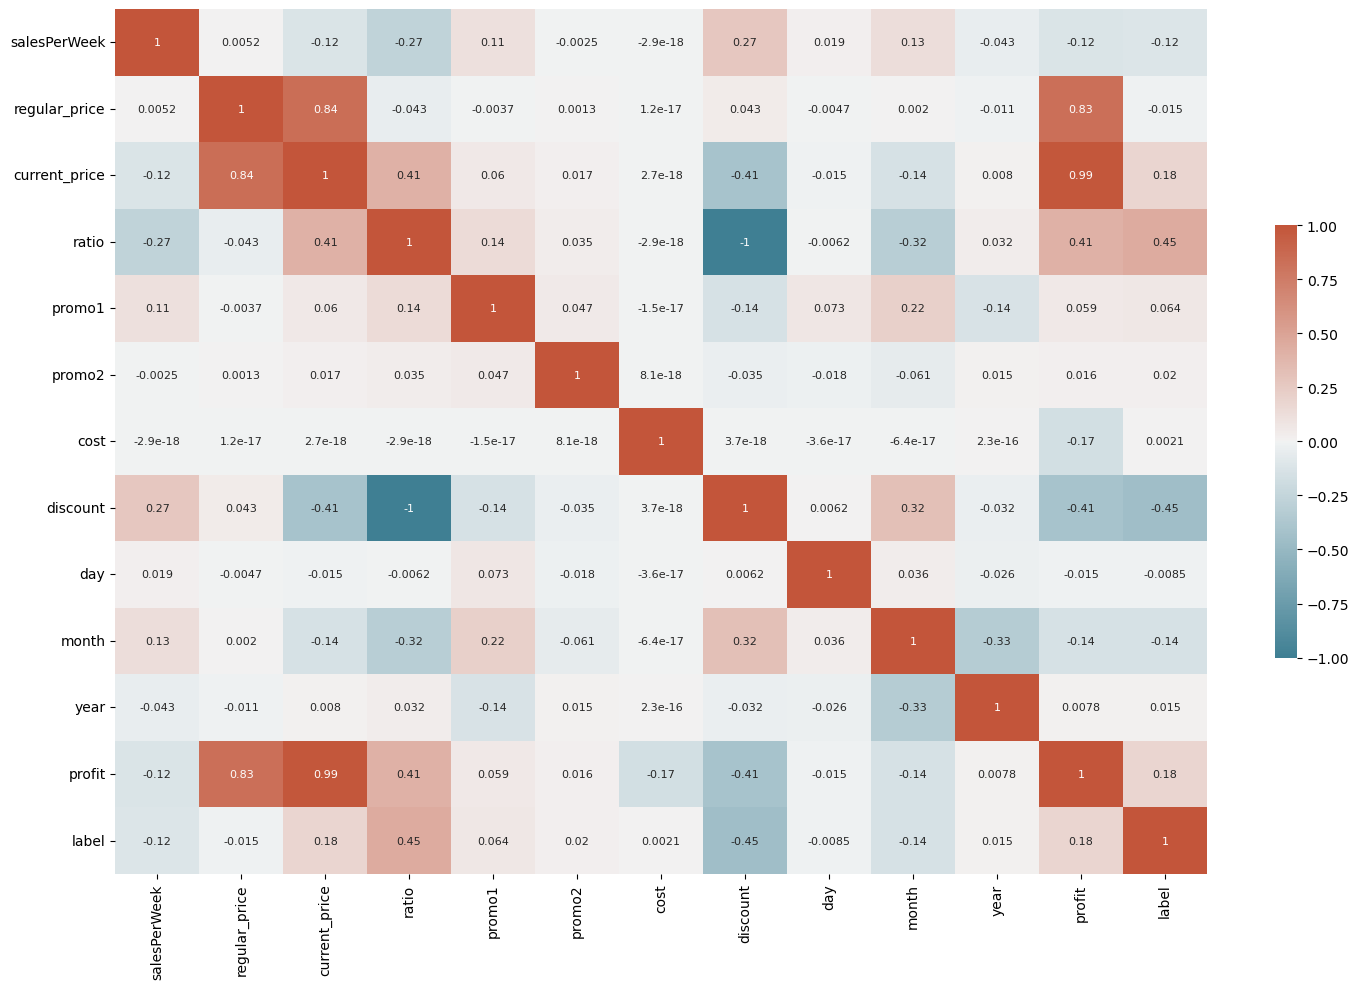

In [6]:
# calculate correlation matrix
cols= ['salesPerWeek', 'regular_price', 'current_price',
       'ratio', 'promo1', 'promo2','cost', 'discount', 'day', 'month',
       'year', 'profit','label']

corr = df[cols].corr(numeric_only= True)# plot the heatmap

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True),                        
            cbar_kws={"shrink": .5}, annot=True,annot_kws={"fontsize":8}
            )
save_fig("2-correlation_matrix")

- **From The Correlation matrix we can figure that:**
    - **`salesPerWeak` has a small positive correlation with `discount` column**
    - **`regular_price`s, `current_prices` and `profit` columns have a highly positive correlation, it is better to derive a new feature from these two and use it instead**
    - **`discount` has a negative correlation with `profit`**
    - **`discount` has a positive correlation with `month`.**
- **For the `label` column**:
    - **has a negative correlation with `discount`**
    - **has a small negative correlation with `sales` and a small positive correlation with `current_price`**
    

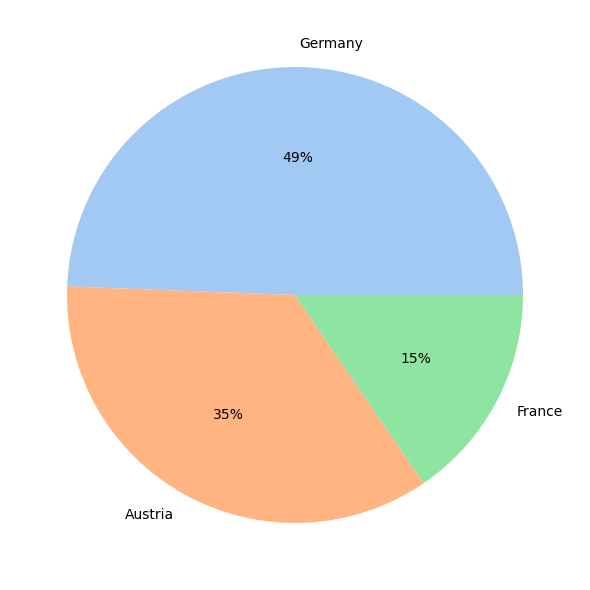

In [7]:
# create a pie plot to calculate the number of occurences of each country

#get the labels and the value_counts of country column
labels = df['country'].unique().tolist()
values = df['country'].value_counts().tolist()

# define Seaborn color palette to use 
palette_color = sns.color_palette('pastel') 

# plotting data on chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%') 

# displaying chart
save_fig("4-country_frequency_pie_chart")
plt.show() 

- **`germany` has the most frequency with `49%`, then `Austria` with `35%` and last `france` with `15%`**

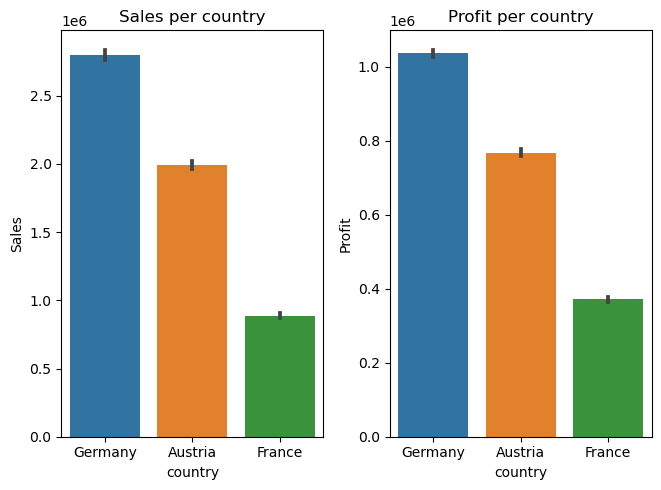

In [8]:
# Create a bar plot to compute sales and profit country
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.barplot(data = df, x= 'country',y='salesPerWeek',estimator='sum')
plt.ylabel('Sales')
plt.title('Sales per country')

# Create a bar plot to compute profit per country
plt.subplot(1, 3, 2)
sns.barplot(data = df, x= 'country',y='profit',estimator='sum')
plt.ylabel('Profit')
plt.title('Profit per country')

plt.tight_layout()  # Adjust the spacing between subplots
save_fig("5-sales_and_profit_per_country")
plt.show()

In [9]:
# compute each country's profit
df.groupby(['country'])['profit'].sum()

country
Austria     768455.62
France      371214.18
Germany    1037710.20
Name: profit, dtype: float64

- **`germany` has the highest amount of `sales` and `profit` followed by `Austria` then `france`**

In [10]:
# Compute the amount of `promo1` per `country`
df.groupby(['country'])['promo1'].sum()

country
Austria    2270
France      900
Germany    3020
Name: promo1, dtype: int64

In [11]:
# Compute the amount of `promo2` per `country`
df.groupby(['country'])['promo2'].sum()

country
Austria      0
France     490
Germany      0
Name: promo2, dtype: int64

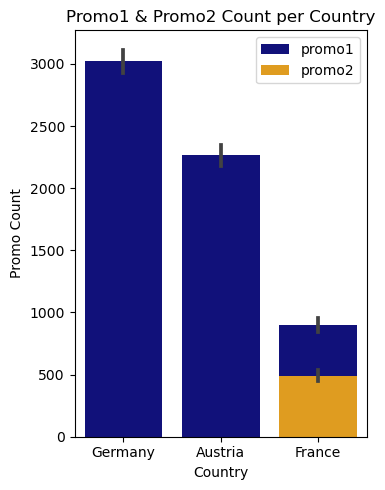

In [12]:
# Create a bar plot to calculate the count of promo1 and promo2 by country

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.barplot(data = df, x= 'country',y='promo1',estimator='sum', label='promo1',color='darkblue')
sns.barplot(data = df, x= 'country',y='promo2',estimator='sum', label='promo2',color='orange')

plt.xlabel('Country')
plt.ylabel('Promo Count')
plt.title('Promo1 & Promo2 Count per Country')

plt.legend()

save_fig('6-promos_count_per_country')
plt.show()

- **Looks like `promo2` took place only in `france`**
- **Also there might be a relationship between the number of `promos` and `sales` in a `country`, but no. of `promos` that happened is less than 10% of the dataset.**

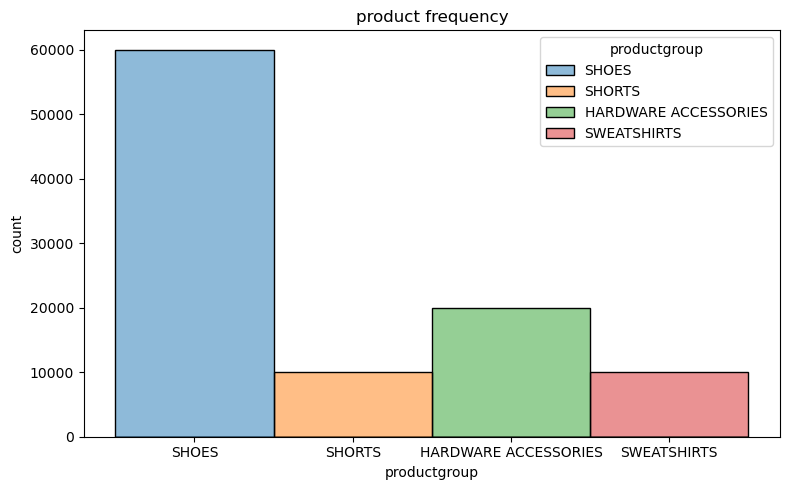

In [13]:
# Create a bar plot to calculate the frequency of each product
plt.figure(figsize=(8, 5))

sns.histplot(data = df, x='productgroup',hue='productgroup')
plt.ylabel('count')
plt.title('product frequency')

plt.tight_layout()
save_fig('7-Product_group_frequency')
plt.show()

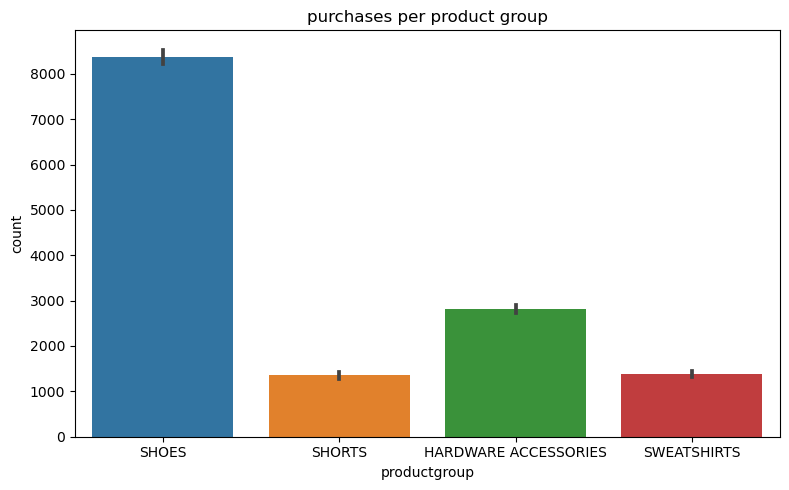

In [14]:
# plot a bar plot to compute how many purchases done in each group
plt.figure(figsize=(8, 5))

sns.barplot(data = df, x= 'productgroup',y='label',estimator='sum')

plt.ylabel('count')
plt.title('purchases per product group')
plt.tight_layout()

save_fig('8-Product_group_purchases')
plt.show()

- **Conclusion:** 
    - **The data in `productgroup` seems to be imbalanced**
    - **The most purchases happened in `shoes` category, followed by ` Hardware Accessories`, `sweatshirts` and `shorts`**

#### What is the success rate of each promo?

In [15]:
# Success_rate of promo1

# Get the list of unique countries in the dataset
countries = df['country'].unique()

# Iterate over each country
for country in countries:
    # Filter the dataset for the current country and the desired conditions
    filtered_df = df[(df['country'] == country) & (df['promo1'] == 1) & (df['promo2'] == 0) & (df['label'] == 1) ]

    # Calculate the success rate for promo1 in the current country
    success_rate = (len(filtered_df) / len(df[(df['country'] == country) & (df['promo1'] == 1) & (df['promo2'] == 0)])) * 100

    # Print the success rate for the current country
    print(f"Promo1 Success Rate for {country}: {success_rate}%")


# success rate of promo2 in France

# Calculate the success rate for promo1 in the current country
filtered_df2 = df[(df['country'] == 'France') & (df['promo1'] == 0) & (df['label'] == 1) & (df['promo2'] == 1)]
success_rate2 = (len(filtered_df) / len(df[(df['country'] == 'France') & (df['promo1'] == 0) & (df['promo2'] == 1)] )) * 100
# Print the success rate for the current country
print(f"\nPromo2 Success Rate for France: {success_rate2}%")

Promo1 Success Rate for Germany: 22.251655629139073%
Promo1 Success Rate for Austria: 22.86343612334802%
Promo1 Success Rate for France: 20.759493670886076%

Promo2 Success Rate for France: 43.15789473684211%


- **conclusion:**
    - **`promo1` seems to have the same succes rate in each country**
    - **`promo2` have twice the success rate in `france` than `promo1`**

#### What is the year with the most purchases?

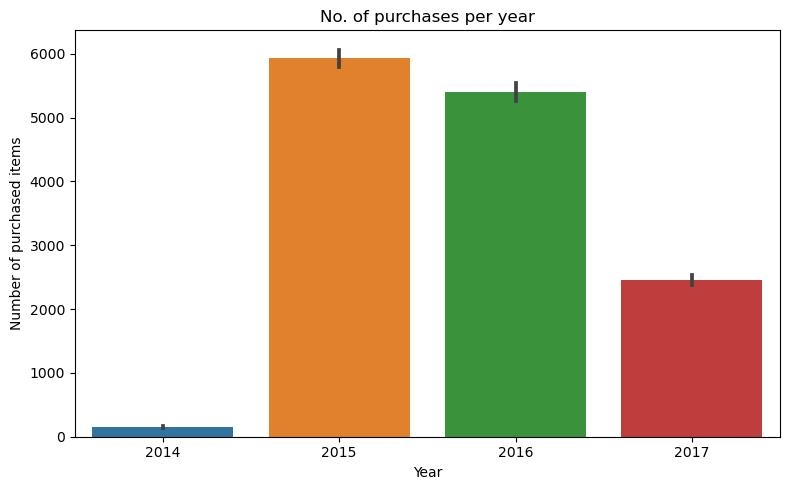

In [16]:
# plot a bar plot to compute how many purchases done in each year
plt.figure(figsize=(8, 5))

sns.barplot(data=df, x='year',y='label',estimator='sum')

plt.xlabel('Year')
plt.ylabel('Number of purchased items')
plt.title('No. of purchases per year')
plt.tight_layout()

save_fig('9-purchases_per_year')
plt.show()

- **The year with the most purchases is 2015 followed by 2016, with low amount of purchases in 2017 and very low purchases in 2014**

In [17]:
#Figureout the start and end date of our dataset
df.retailweek.describe(datetime_is_numeric=True)

count                        100000
mean     2016-02-25 04:31:52.320000
min             2014-12-28 00:00:00
25%             2015-07-26 00:00:00
50%             2016-02-21 00:00:00
75%             2016-10-02 00:00:00
max             2017-04-30 00:00:00
Name: retailweek, dtype: object

- **This makes sense now as the data started from the end of 2014 and ended in half of 2017**
- **In this case, measuring amount of purchases by the year is not a good measure, let's see amount of purchases per month**

#### What is the month with the most Purchases?

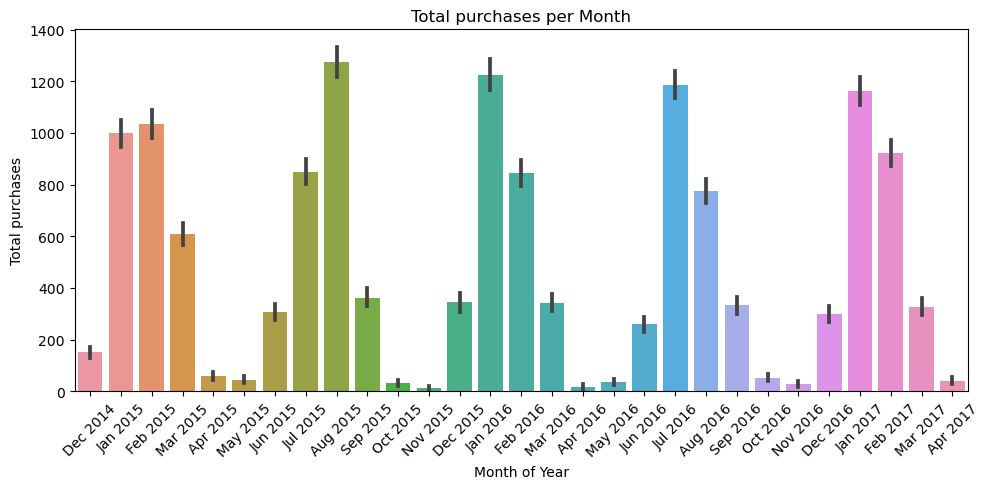

In [18]:
# create month_year column
df['month_year'] = df['retailweek'].dt.strftime('%b %Y')

# sort the dataset by the date column
df = df.sort_values('retailweek')

# plot a bar plot to compute how many purchases done in each month
plt.figure(figsize=(10, 5))

sns.barplot(data=df, x='month_year',y='label',estimator='sum')

plt.title('Total purchases per Month')
plt.xlabel('Month of Year')
plt.ylabel('Total purchases')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees

plt.tight_layout()

save_fig('10-total_purchases_per_month')
plt.show()

- **The month with the highest purchases is `Aug 2015`**
- **The purchases seems to get absolute high `june, july, August` and `january, February` of each year**
- **Adding `month_year` column to our data looks better than the year column, to be added in featur engineering**

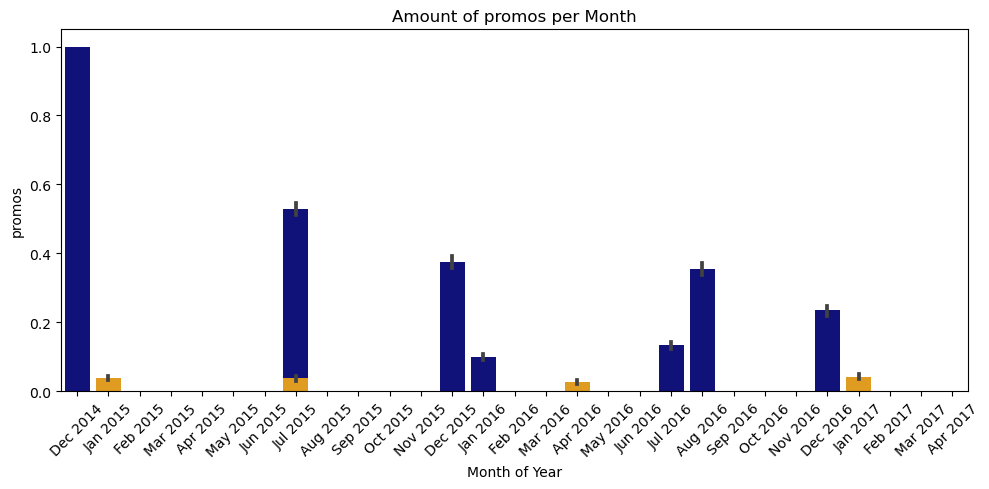

In [19]:
# plot a bar plot to compute amount of promos done in each month
plt.figure(figsize=(10, 5))

sns.barplot(data= df, x='month_year', y='promo1',label='promo1',color='darkblue')
sns.barplot(data= df, x='month_year', y='promo2',label='promo2',color='orange')

plt.title('Amount of promos per Month')
plt.ylabel('promos')
plt.xlabel('Month of Year')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
plt.tight_layout()

save_fig('11-amount_of_promos_month')
plt.show()

- **Conclusion:**
    - **Seems like `promos` that happens mostly `December` and slightly in `january`, increase the purchases in both `january` and `february`**
    - **Also the `promos` that happens in `july` and `Aug`, increase the `purchases` in these months significantly**

#### How many purchases done per gender?

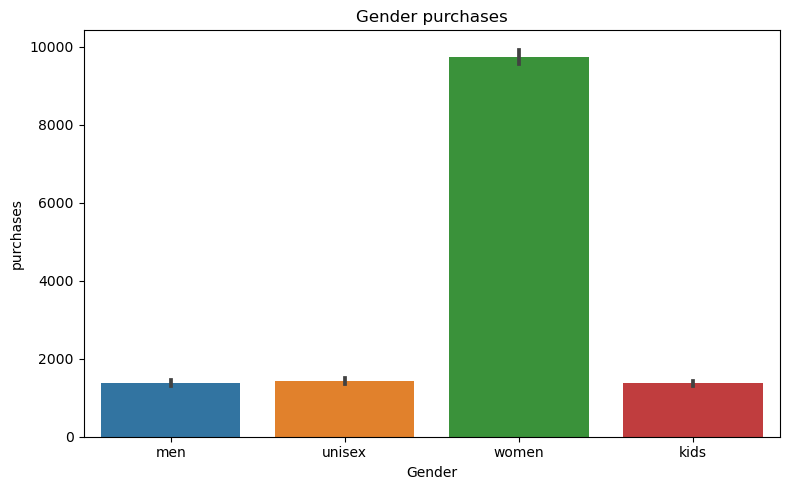

In [20]:
# plot a bar plot to compute amount of purchases per gender
plt.figure(figsize=(8, 5))

sns.barplot(data= df, x='gender', y='label',estimator='sum')


plt.title('Gender purchases')
plt.ylabel('purchases')
plt.xlabel('Gender')
plt.tight_layout()

save_fig('12-amount_of_gender_purchases')
plt.show()

In [21]:
# compute percentage of purchases done by each gender

# Get the list of unique gender in the dataset
genders = df['gender'].unique()

# Iterate over each country
for gender in genders:
    # Filter the dataset for the current gender and the desired conditions
    filtered_df = df[(df['gender'] == gender) & (df['label'] == 1)]

    # Calculate the percentage of purchases done by each gender
    percentage_rate = (len(filtered_df) / len(df[(df['gender'] == gender)])) * 100

    # Print the  percentage of purchases done by each gender
    print(f"percentage of purchases for {gender}: {percentage_rate}%")

percentage of purchases for men: 13.76%
percentage of purchases for unisex: 14.26%
percentage of purchases for women: 13.928571428571429%
percentage of purchases for kids: 13.76%


- **Conclusion**:
    - **Women have the most purchases in the dataset, but keep in mind that women has 70000 appearances in the dataset, so its kinda imbalanced.**
    - **Also the percentage purchases done by each gender are so close, despite the no. of appearances in the dataset**

#### What is the amount of purchases done in each category"

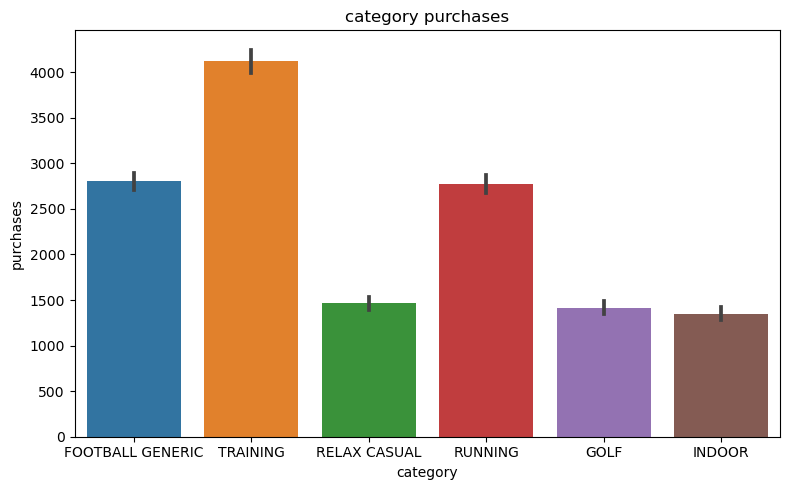

In [22]:
# plot a bar plot to compute amount of purchases per category
plt.figure(figsize=(8, 5))

sns.barplot(data= df, x='category', y='label',estimator='sum')


plt.title('category purchases')
plt.ylabel('purchases')
plt.xlabel('category')
plt.tight_layout()

save_fig('13-amount_of_purchases_category')
plt.show()

In [23]:
df['category'].value_counts()

TRAINING            30000
FOOTBALL GENERIC    20000
RUNNING             20000
RELAX CASUAL        10000
GOLF                10000
INDOOR              10000
Name: category, dtype: int64

In [5]:
# compute percentage of purchases done by each category

# Get the list of unique category in the dataset
categories = df['category'].unique()

# Iterate over each country
for category in categories:
    # Filter the dataset for the current category and the desired conditions
    filtered_df = df[(df['category'] == category) & (df['label'] == 1)]

    # Calculate the percentage of purchases done by each category
    percentage_rate = (len(filtered_df) / len(df[(df['category'] == category)])) * 100

    # Print the  percentage of purchases done by each category
    print(f"percentage of purchases for {category}: {percentage_rate}%")

percentage of purchases for TRAINING: 13.736666666666666%
percentage of purchases for GOLF: 14.17%
percentage of purchases for RUNNING: 13.865%
percentage of purchases for RELAX CASUAL: 14.67%
percentage of purchases for FOOTBALL GENERIC: 14.01%
percentage of purchases for INDOOR: 13.48%


- **Despite Training has the most purchases per category, all categories have approximately the same percentage of purchases**

#### what is amount of purchases done in each style?

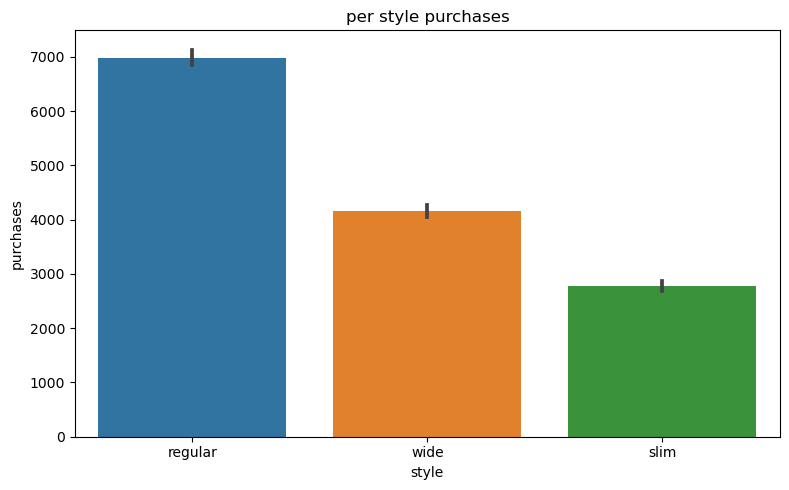

In [35]:
# plot a bar plot to compute amount of purchases per product
plt.figure(figsize=(8, 5))

sns.barplot(data= df, x='style', y='label',estimator='sum')


plt.title('per style purchases')
plt.ylabel('purchases')
plt.xlabel('style')
plt.tight_layout()

save_fig('16-amount_of_purchases_per_style')
plt.show()

#### What are amount of purchases done by each size?

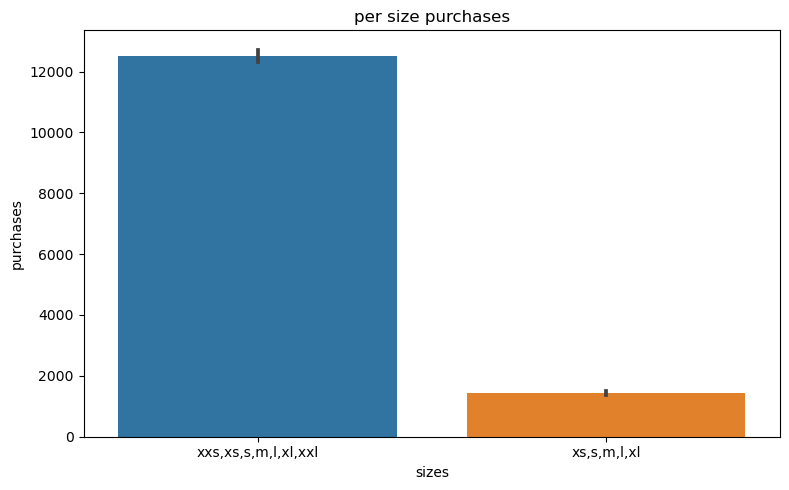

In [38]:
# plot a bar plot to compute amount of purchases per sizes
plt.figure(figsize=(8, 5))

sns.barplot(data= df, x='sizes', y='label',estimator='sum')


plt.title('per size purchases')
plt.ylabel('purchases')
plt.xlabel('sizes')
plt.tight_layout()

save_fig('17-amount_of_purchases_per_size')
plt.show()

#### What is the amount of purchases of each product?

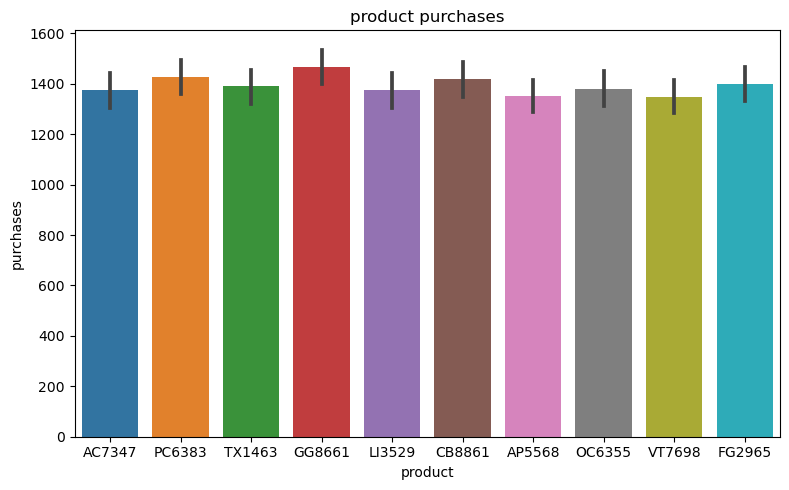

In [27]:
# plot a bar plot to compute amount of purchases per product
plt.figure(figsize=(8, 5))

sns.barplot(data= df, x='product.1', y='label',estimator='sum')


plt.title('product purchases')
plt.ylabel('purchases')
plt.xlabel('product')
plt.tight_layout()

save_fig('14-amount_of_purchases_product')
plt.show()

- **Each product has approximately the same amount of purchases**

#### Is Discount a factor in increasing sales or labels?

In [28]:
# create bins for the cut function
bins = [0, 0.25, 0.5, 0.75, 1]

# create labels for the bins
labels = ['0-25', '25-50', '50-75', '75-100']

# use pd.cut() to convert the column to categorical
df['discount_cat'] = pd.cut(df['discount'], bins=bins, labels=labels)

In [29]:
df['discount_cat'].value_counts()

50-75     47330
25-50     36030
0-25      15150
75-100        0
Name: discount_cat, dtype: int64

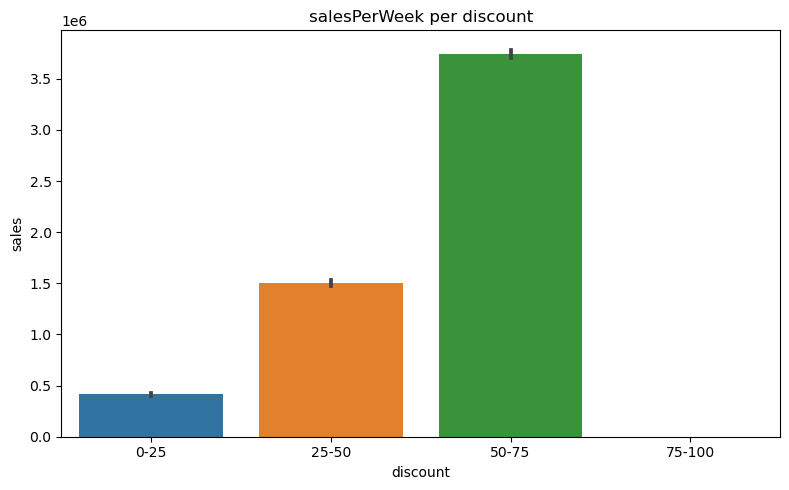

In [31]:
# plot a bar plot to compute amount of salesPerWeek per discount category

plt.figure(figsize=(8, 5))
sns.barplot(data= df, x='discount_cat', y='salesPerWeek',estimator='sum')


plt.title('salesPerWeek per discount')
plt.ylabel('sales')
plt.xlabel('discount')
plt.tight_layout()

save_fig('14-salesPerWeek_per_discount')
plt.show()

- **conclusion:**
    - **`salesPerWeek` is higher when the `discount` on product increases, note that there is no values between 75_100.**

In [47]:
# Create a df with only purchased items
temp_df = df[df['label'] == 1]
# Group the DataFrame by 'country' column and find the 5 most purchased products in each country
top_purchased = temp_df.groupby(['country'])['product'].value_counts().groupby('country').head(5)

# Iterate over unique countries and display the top frequent articles per country
unique_countries = ['Germany','Austria','France']
for country in unique_countries:
    print(f"********** Country: {country} **********")
    print("Top 5 Most Frequent Articles:")
    products = top_purchased.loc[country]
    prices = 0
    for product, count in products.items():
        print(f"product: {product}")
        print(f"purchased: {count}")
        print("Specifications:")
        specs = df[(df['country'] == country) & (df['product'] == product)][['product','current_price', 'productgroup', 'category', 'gender']].head(1)
        print(specs)
        print()

********** Country: Germany **********
Top 5 Most Frequent Articles:
product: SW2464
purchased: 65
Specifications:
      product  current_price productgroup  category gender
11570  SW2464          23.95        SHOES  TRAINING  women

product: MP6772
purchased: 61
Specifications:
     product  current_price productgroup  category gender
9370  MP6772           3.95        SHOES  TRAINING  women

product: BX8284
purchased: 53
Specifications:
     product  current_price productgroup  category gender
5090  BX8284          15.95        SHOES  TRAINING  women

product: QD2412
purchased: 51
Specifications:
      product  current_price productgroup  category gender
13400  QD2412          57.95        SHOES  TRAINING  women

product: DZ3492
purchased: 42
Specifications:
     product  current_price productgroup  category gender
2100  DZ3492          50.95        SHOES  TRAINING  women

********** Country: Austria **********
Top 5 Most Frequent Articles:
product: XC9518
purchased: 52
Specification

- **The 5 most purchased products:**
    - `SW2464` `SW2464` `BX8284` `QD2412` `DZ3492` in **germany**.
    - `XC9518` `DM6477` `SF1988` `AX5913` `FK7423` in **Austria**.
    - `MA7179` `BR3179` `TC9631` `ST3419` `FE6662` in **France**.
- **The Product group with the most purchases is `shoes`, Category `Training`, Gender `Women`**

In [99]:
for country in unique_countries:
    print(f"********** Country: {country} **********")
    print("Top 5 Most Frequent Articles:")
    products = top_purchased.loc[country]
    prices = 0
    for product, count in products.items():
        prices = df[(df['country'] == country) & (df['product'] == product)& (df['label'] == 1)]['current_price'].value_counts()
        avg_prices_product = sum((prices.index * prices.values).tolist()) / prices.count()
    avg_prices_country = avg_prices_product / 5
    print('average prices per country '+ str(avg_prices_country))

********** Country: Germany **********
Top 5 Most Frequent Articles:
average prices per country 56.517999999999994
********** Country: Austria **********
Top 5 Most Frequent Articles:
average prices per country 19.195999999999998
********** Country: France **********
Top 5 Most Frequent Articles:
average prices per country 21.303999999999995


- **Conclusion:**
    - Customers in **Germany** can pay prices that are approximately twice as expensive as those in **France** and **Austria**.
    - We can increase purchases in both Austria and France by offering products at lower price

### Explore the numerical columns

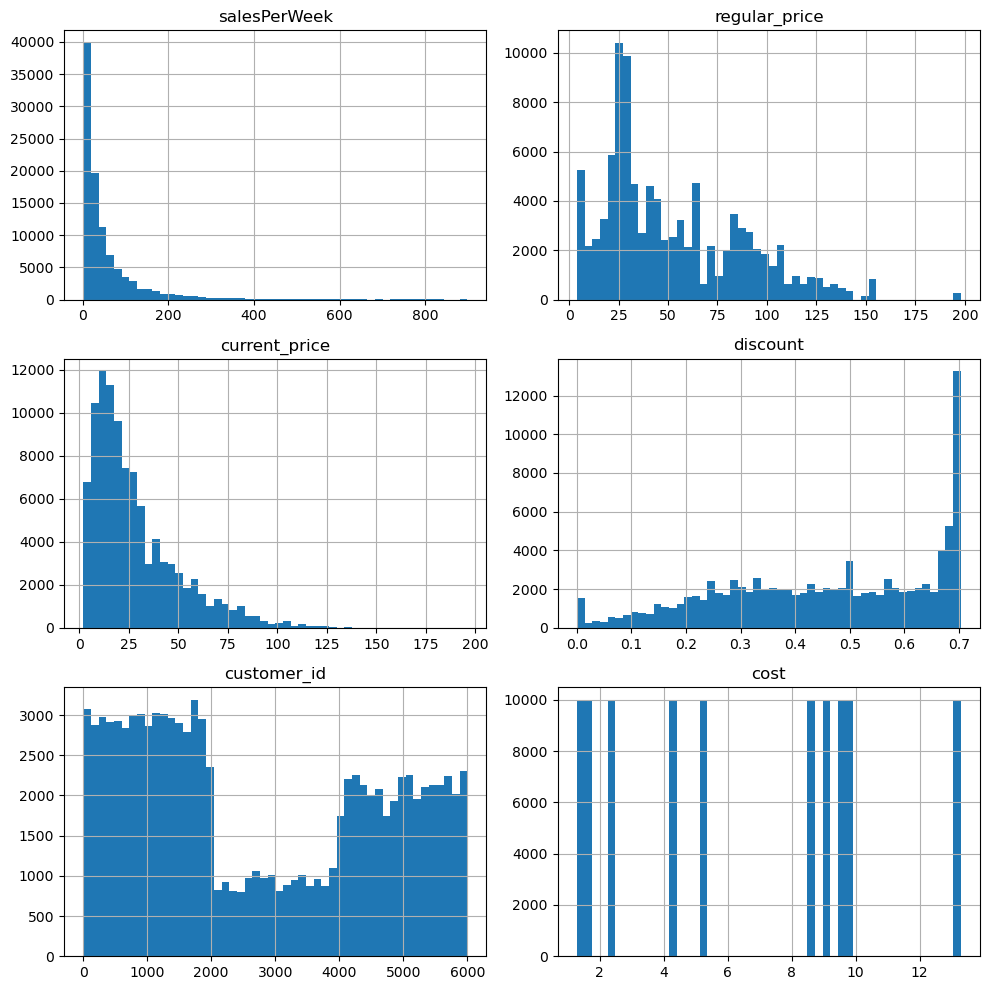

In [7]:
cols=['salesPerWeek','regular_price','current_price','discount','customer_id','cost']

df[cols].hist(bins=50,figsize=(10,10))
plt.tight_layout()
save_fig('18.explorenumericalcolumns')
plt.show()


- **conclusion:**
    - **The 3 columns `salesPerWeek`, `regular_prices`, `current_prices` have a heavy tailed distribution, it might be helpful to take the log of values, to make it look more gaussian before we feature scale it.**
    - **`customer_id` doesn't seem to have any value, so it is better to not use it**

## Things to try next
- **convert rgb columns to colors and figure out if there is a correlation between purchases and colors**
- **use unsupervised visualization techinques to identify clusters in the data.**